In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

#image = rotate(image, angle=-90, order=0)

rr, cc = ellipse(100, 100, 80, 50)
image[rr, cc] = 1

image = rotate(image, angle=-80, order=0)

label_img = label(image)
regions = regionprops(label_img)

170.0216518746833
hope 90.0251734022288
-0.000439358738686325
hello
90.02517340222882


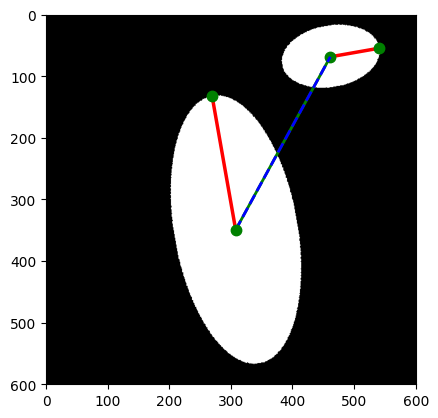

In [6]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for i in range(0,len(regions)):
    props = regions[i]
    y0, x0 = props.centroid
    try:
        r1, r0 = regions[i+1].centroid
        pos_diff = np.sqrt((x0 - r0)**2 + (y0 - r1)**2)
        ax.plot((r0, x0), (r1, y0), '-g', linewidth=2)
        orient1 = props.orientation
        
        #print(orient1*180/np.pi)
        orient2 = regions[i+1].orientation
        #print(orient2*180/np.pi)
        if abs(orient1) == orient1:
            theta1 = 90 - orient1*180/np.pi
        else:
            a = -90 - orient1*180/np.pi
            theta1 = 180 + a

        print(theta1)
        
        if abs(orient2) == orient2:
            theta2 = 90 - orient2*180/np.pi
        else:
            a = -90 - orient2*180/np.pi
            theta2 = 180 + a

        if theta1 >= theta2:
            alignment = theta1 - theta2
        elif theta2 > theta1:
            alignment = theta2 - theta1
        else:
            break
        
        print('hope ' + str(alignment))
        x2 = x0 - math.sin(orient1) * 0.5 * props.axis_major_length
        y2 = y0 - math.cos(orient1) * 0.5 * props.axis_major_length

        diff_x = x2 - x0
        diff_y = y2 - y0
        vector = np.array([diff_x, diff_y])

        x_iplus = r0 - math.sin(orient2) * 0.5 * regions[i+1].axis_major_length
        y_iplus = r1 - math.cos(orient2) * 0.5 * regions[i+1].axis_major_length

        diff_xiplus = x_iplus - r0
        diff_yiplus = y_iplus - r1
        vector_iplus = np.array([diff_xiplus, diff_yiplus])

        print(vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))

        relative_align = np.arccos(vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))
        print('hello')
        print(relative_align*180/np.pi)

    except:
        r1, r0 = regions[i-1].centroid
        pos_diff = np.sqrt((x0 - r0)**2 + (y0 - r1)**2)
        ax.plot((x0, r0), (y0, r1), '--b', linewidth=2)

        orientation = props.orientation
        x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
        y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
        x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
        y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

        diff_x = x2 - x0
        diff_y = y2 - y0

    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)
    ax.plot(x2, y2, '.g', markersize=15)

ax.axis((0, 600, 600, 0))
plt.show()

y- axis is the "rows" all major axis angles are calculated relative to it.